In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Embedding, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import itertools
from rdkit import Chem
from rdkit.Chem import AllChem
### read in data
da = pd.read_parquet('data/de_train.parquet')

In [5]:
a_1 = np.unique(da.SMILES)[0]

In [22]:
a_1

'C/C(=C\\c1csc(C)n1)[C@@H]1C[C@@H]2O[C@]2(C)CCC[C@H](C)[C@H](O)[C@@H](C)C(=O)C(C)(C)[C@@H](O)CC(=O)N1'

In [21]:
np.unique(da.sm_name)[0]

'5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine'

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
# from rdkit.Chem import AllChem  # This line is not needed for MolToImage

a_1 = np.unique(da.SMILES)[0]  # Assuming da.SMILES is defined and contains SMILES strings
m = Chem.MolFromSmiles(a_1)

# Correct usage
img = Draw.MolToImage(m)


In [13]:
img.save('a1.jpg')

In [25]:
from PIL import Image, ImageDraw
img_path  = "a1.jpg"
img = Image.open(img_path)

# Create a drawing context
draw = ImageDraw.Draw(img)

# Image dimensions
img_width, img_height = img.size

# Calculate positions for the lines (2 horizontal and 3 vertical to create 6 equal parts)
horizontal_line_y1 = img_height // 3
horizontal_line_y2 = 2 * img_height // 3

vertical_line_x1 = img_width // 3
vertical_line_x2 = 2 * img_width // 3

# Red color
red_color = (255, 0, 0)

# Draw two horizontal red lines across the image
draw.line((0, horizontal_line_y2, img_width, horizontal_line_y2), fill=red_color, width=3)
draw.line((0, horizontal_line_y1, img_width, horizontal_line_y1), fill=red_color, width=3)
# Draw two vertical red lines down the image
draw.line((vertical_line_x1, 0, vertical_line_x1, img_height), fill=red_color, width=3)
draw.line((vertical_line_x2, 0, vertical_line_x2, img_height), fill=red_color, width=3)

# Save the modified image
modified_img_path = 'a_1_marked.jpg'
img.save(modified_img_path)

modified_img_path

'a_1_marked.jpg'

######### 肘部图

In [1]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import json
import itertools
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputRegressor


In [2]:
da = pd.read_parquet('data/de_train.parquet')
submission = pd.read_csv('data/sample_submission.csv') #  提交
drug_smile = np.unique(da.SMILES)
y = da.iloc[:,5:]
gene_list = y.columns
Y = y.T

df_zeros = pd.DataFrame(0, index=range(255), columns=range(18211))
df_zeros.columns = gene_list

In [3]:
Y.shape

(18211, 614)

d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

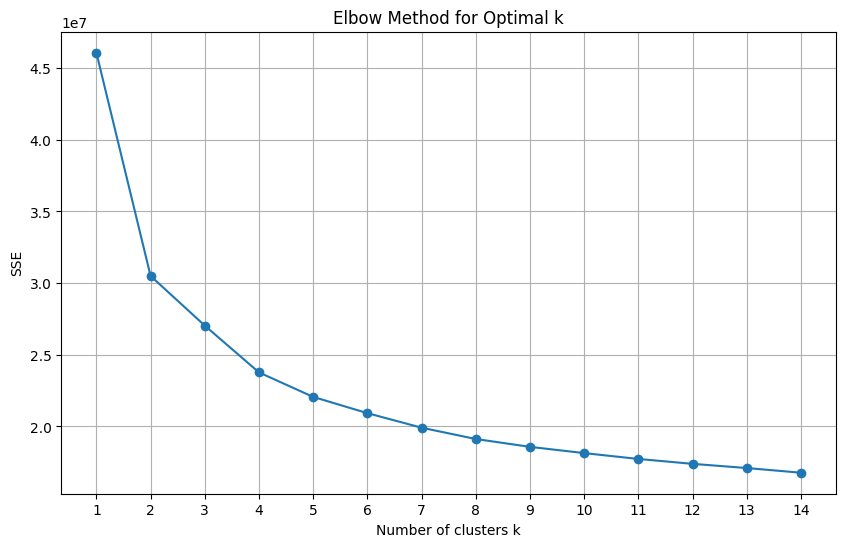

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 假设Y是你的DataFrame，并且每一列是一个特征
# Y = ...

# 计算不同k值下的SSE
sse = []
k_range = range(1, 15)  # 例如，考虑簇数量从1到14
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Y)
    sse.append(kmeans.inertia_)  # inertia_属性是模型的SSE

# 绘制SSE与k的关系图
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('SSE')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow1.png', bbox_inches='tight', dpi=300)

d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads.

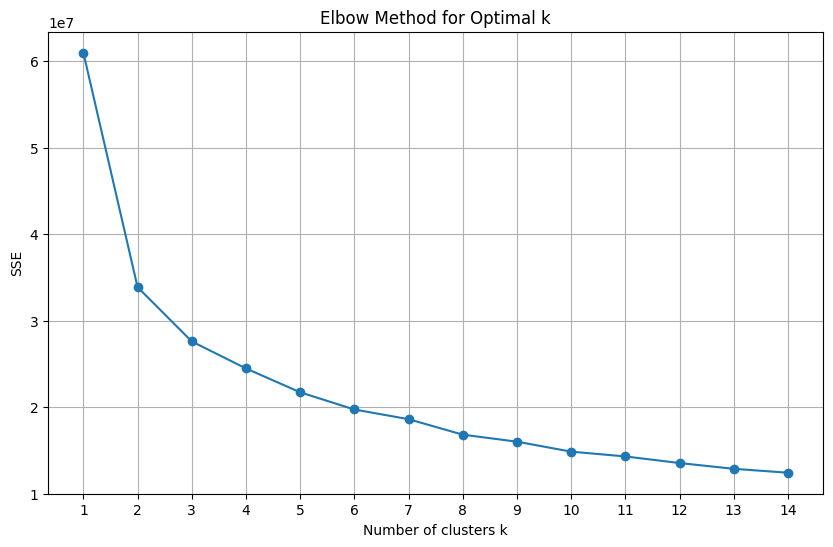

In [7]:
# sse = []
# k_range = range(1, 15)  # 例如，考虑簇数量从1到14
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(y)
#     sse.append(kmeans.inertia_)  # inertia_属性是模型的SSE

# # 绘制SSE与k的关系图
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, sse, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters k')
# plt.ylabel('SSE')
# plt.xticks(k_range)
# plt.grid(True)
# plt.savefig('elbow2.png', bbox_inches='tight', dpi=300)

d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


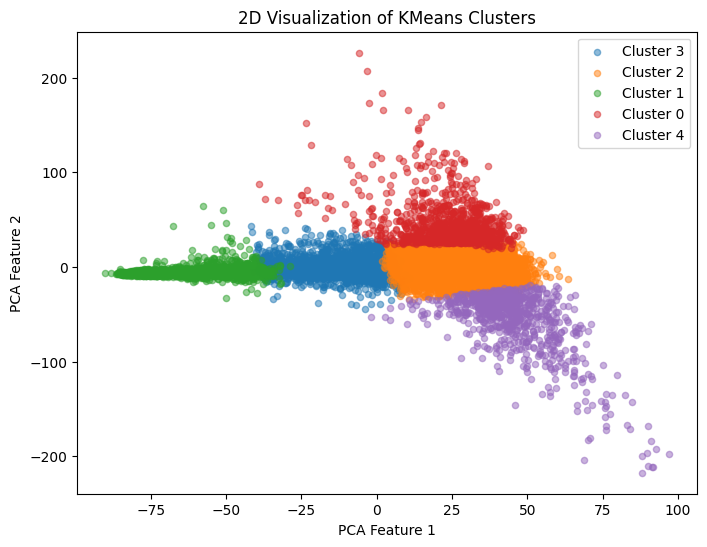

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
da = pd.read_parquet('data/de_train.parquet')
submission = pd.read_csv('data/sample_submission.csv') #  提交
drug_smile = np.unique(da.SMILES)
y = da.iloc[:,5:]
gene_list = y.columns
Y = y.T
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(Y)

# Get cluster labels for each data point.
cluster_info = kmeans.labels_

# Create a dictionary to hold indices of points in each cluster.
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)

# Apply PCA to reduce the data to two dimensions for visualization.
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)


plt.figure(figsize=(8, 6))
for label, indices in clusters.items():
    # 缩小点的大小为20（默认是较大的），提高透明度为0.5
    plt.scatter(Y_pca[indices, 0], Y_pca[indices, 1], label=f'Cluster {label}', s=20, alpha=0.5)

plt.title('2D Visualization of KMeans Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()
plt.savefig('PCA_kmeans.png', bbox_inches='tight', dpi=300)

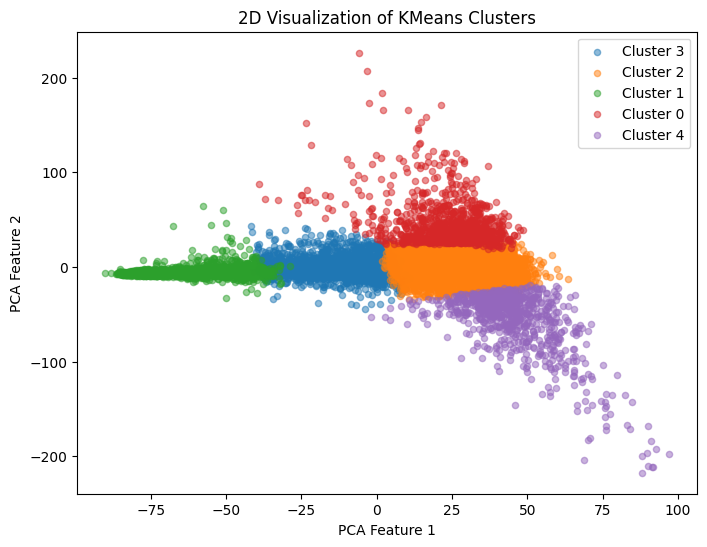

In [2]:
plt.figure(figsize=(8, 6))
for label, indices in clusters.items():
    # 缩小点的大小为20（默认是较大的），提高透明度为0.5
    plt.scatter(Y_pca[indices, 0], Y_pca[indices, 1], label=f'Cluster {label}', s=20, alpha=0.5)

plt.title('2D Visualization of KMeans Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.savefig('PCA_kmeans.png', bbox_inches='tight', dpi=300)

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

# KMeans聚类
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(Y)
Y['cluster'] = kmeans.labels_

# 执行PCA降到3维
pca = PCA(n_components=3)
components = pca.fit_transform(Y.drop('cluster', axis=1))
total_var = pca.explained_variance_ratio_.sum() * 100

# 使用Plotly进行可视化
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=Y['cluster'].astype(str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PCA 1', '1': 'PCA 2', '2': 'PCA 3'}
)
fig.show()
# 将图表保存为HTML文件
fig.write_html("3D_kmeans.html")


d:\py\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

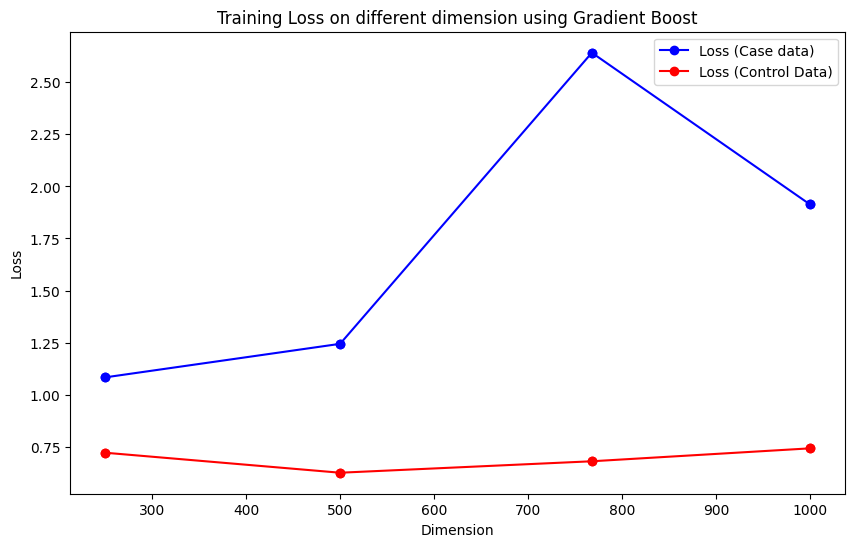

In [2]:
import matplotlib.pyplot as plt

dim = [250, 500, 768, 1000]
loss_train_all = [1.083, 1.244, 2.642, 1.914]
loss_train_half = [0.721, 0.625, 0.68, 0.742]

plt.figure(figsize=(10, 6))

plt.plot(dim, loss_train_all, marker='o', linestyle='-', color='blue', label='Loss (Case data)')
plt.plot(dim, loss_train_half, marker='o', linestyle='-', color='red', label='Loss (Control Data)')

plt.scatter(dim, loss_train_all, color='blue')
plt.scatter(dim, loss_train_half, color='red')

plt.xlabel('Dimension')
plt.ylabel('Loss')
plt.title('Training Loss on different dimension using Gradient Boost')
plt.legend()

plt.savefig('loss_1.png', format='png', dpi=300)

In [4]:
plt.savefig('loss_1.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

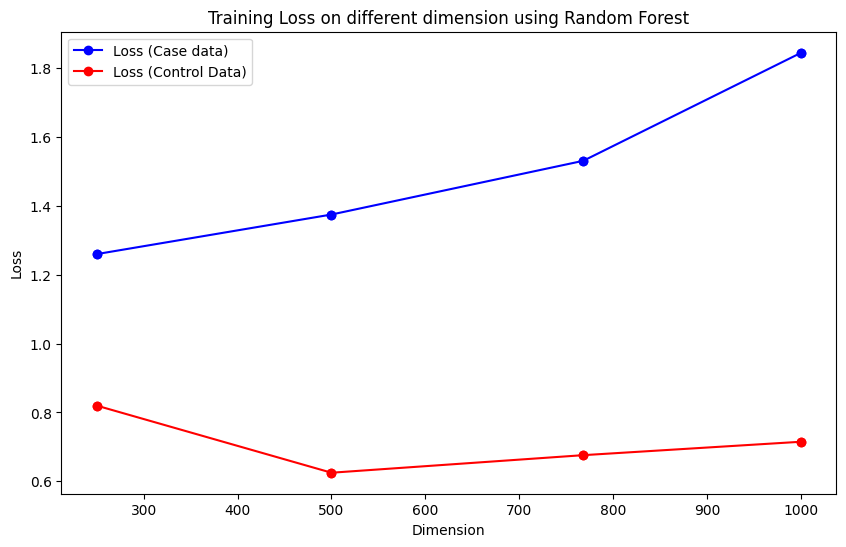

In [3]:
### discission tree

import matplotlib.pyplot as plt

dim = [250, 500, 768, 1000]
loss_train_all = [1.26, 1.375, 1.531, 1.845]
loss_train_half = [0.82, 0.625, 0.676, 0.715]

plt.figure(figsize=(10, 6))

plt.plot(dim, loss_train_all, marker='o', linestyle='-', color='blue', label='Loss (Case data)')
plt.plot(dim, loss_train_half, marker='o', linestyle='-', color='red', label='Loss (Control Data)')

plt.scatter(dim, loss_train_all, color='blue')
plt.scatter(dim, loss_train_half, color='red')

plt.xlabel('Dimension')
plt.ylabel('Loss')
plt.title('Training Loss on different dimension using Random Forest')
plt.legend()

plt.savefig('loss_2.png', format='png', dpi=300)

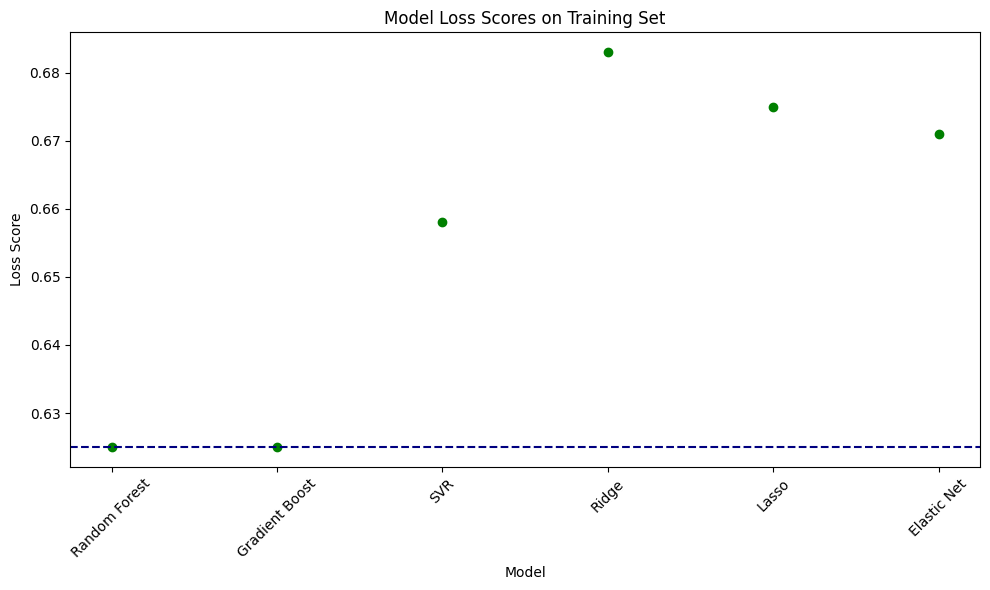

In [11]:
import matplotlib.pyplot as plt

loss_score = [ 0.625, 0.625, 0.658, 0.683, 0.675, 0.671]
model = ["Random Forest", "Gradient Boost", "SVR", "Ridge", "Lasso", "Elastic Net"]

plt.figure(figsize=(10, 6))
plt.scatter(model, loss_score, color= "green")
plt.xticks(rotation=45)  # This rotates the model names on the x-axis by 45 degrees
plt.axhline(y=0.625, color='navy', linestyle='--')  # Adds a horizontal line at y = 0.847
plt.xlabel('Model')
plt.ylabel('Loss Score')
plt.title('Model Loss Scores on Training Set')
plt.tight_layout()
plt.savefig('training Loss Scores.png', format='png', dpi=300)

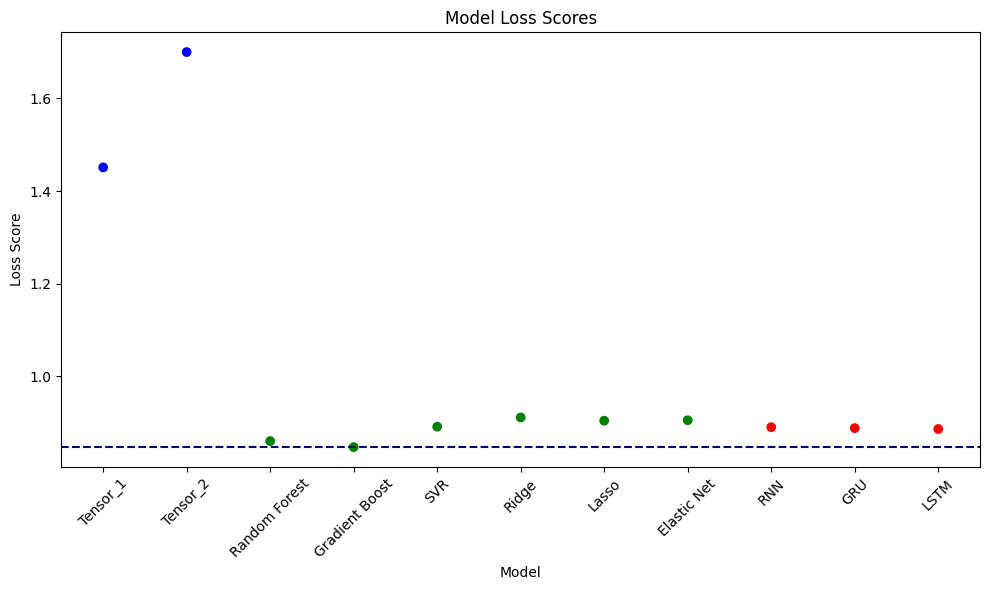

In [9]:
import matplotlib.pyplot as plt

loss_score = [1.451, 1.7, 0.86, 0.847, 0.891, 0.911, 0.904, 0.905, 0.890, 0.888, 0.886]
model = ["Tensor_1", "Tensor_2", "Random Forest", "Gradient Boost", "SVR", "Ridge", "Lasso", "Elastic Net", "RNN", "GRU", "LSTM"]
col = ['blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green',"red", "red", "red"]
plt.figure(figsize=(10, 6))
plt.scatter(model, loss_score, color= col)
plt.xticks(rotation=45)  # This rotates the model names on the x-axis by 45 degrees
plt.axhline(y=0.847, color='navy', linestyle='--')  # Adds a horizontal line at y = 0.847
plt.xlabel('Model')
plt.ylabel('Loss Score')
plt.title('Model Loss Scores')
plt.tight_layout()  # This will make sure everything fits without overlappin


plt.savefig('Model Loss Scores.png', format='png', dpi=300)